In [1]:
import pandas as pan;
import numpy as np;
import matplotlib.pyplot as plotter;
import seaborn as sns;

In [2]:
matrix_data = pan.read_csv("WithoutWeirdOutliers_Ames_Housing_Data.csv")

In [5]:
#reading the feature description file:
try:
    file = open("C://Users//omoke//Downloads//UNZIP_FOR_NOTEBOOKS_FINAL//DATA//Ames_Housing_Feature_Description.txt", mode= "r")
    print(file.read())
    file.close()
except:
    print("Revist path")

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [7]:
#we can use the index as a unique identifier, so we don't really need to worry too much about the PID column
matrix_data = matrix_data.drop("PID", axis = 1)

In [8]:
#percentage of data missing
def percent_missing(matrix_data):
    val = matrix_data.isnull().sum()/len(matrix_data) * 100
    val = val[val > 0].sort_values()
    return val
len(percent_missing(matrix_data))
percent_missing(matrix_data)

Electrical         0.034165
Garage Cars        0.034165
BsmtFin SF 1       0.034165
Garage Area        0.034165
BsmtFin SF 2       0.034165
Bsmt Unf SF        0.034165
Total Bsmt SF      0.034165
Bsmt Half Bath     0.068329
Bsmt Full Bath     0.068329
Mas Vnr Area       0.785787
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 1     2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Garage Finish      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Mas Vnr Type      60.642296
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

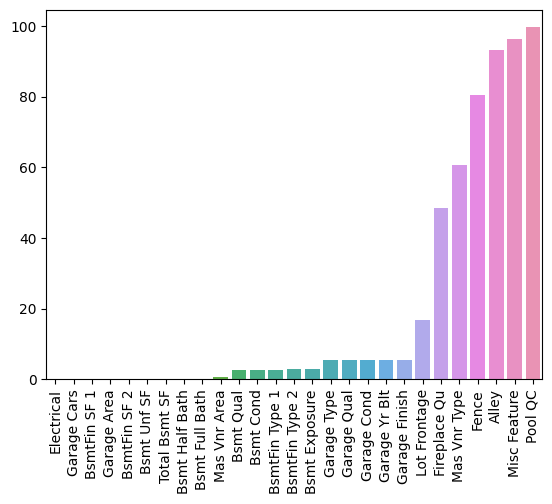

In [9]:
sns.barplot(x = percent_missing(matrix_data).index, y = percent_missing(matrix_data))
plotter.xticks(rotation = 90);